In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img


from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import sys
import os

from IPython.display import display, clear_output

2023-01-18 18:06:25.899108: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-18 18:06:26.028161: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jiehui/test_ws/devel/lib:/opt/ros/melodic/lib
2023-01-18 18:06:26.028181: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-18 18:06:26.709483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer

# Get the data and store the directories in dataframe

In [2]:
def plot_data_distribution(file_directory_df, additional_text):
    plt.bar(file_directory_df['class'].value_counts().index, file_directory_df['class'].value_counts())
    plt.title("Data Distribution" + " (" + additional_text + ")")


In [3]:
def get_data_file_directories(data_directory):
    file_directory_dict = {
    "class":[],
    "directory":[]
    }

    for root, dirs, files in os.walk(data_directory, topdown=False):
        for name in files:
            file_directory_dict['class'].append(root.split("/")[-1])
            file_directory_dict['directory'].append(os.path.join(root, name))

    file_directory_df = pd.DataFrame(file_directory_dict)

    return file_directory_df

In [4]:
def get_num_of_augmentation_for_each_class(file_directory_df, num_of_images_for_each_class):
    num_of_augmentation_for_each_class = {}
    for object_class in file_directory_df['class'].unique():
        num_of_images_for_class = len(file_directory_df.loc[file_directory_df['class'] == object_class])
        num_of_augmentation_for_each_class[object_class] = num_of_images_for_each_class // num_of_images_for_class

    return num_of_augmentation_for_each_class

In [5]:
def generate_augmentations_for_each_class(num_of_augmentation_for_each_class, file_directory_df):
    # Create the augmentation generator
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        shear_range=0.2,
        horizontal_flip=True,
        rotation_range=40, fill_mode='nearest',
        channel_shift_range = 10,
        zoom_range=0.1,
        )
    
    # Augmented Training Data Folder
    directory_path = file_directory_df['directory'][0].rsplit('/', 3)[0] + '/augmented_training_data'
    
    # Augmented Training Data Folder for each class
    directory_path_for_each_class = {}
    # For each class
    for object_class in num_of_augmentation_for_each_class.keys():
        
        # Create the folder path and add to dictionary
        object_directory_path = directory_path + '/' + object_class
        directory_path_for_each_class[object_class] = object_directory_path
        
        # If folder not created, create it
        if not (os.path.exists(object_directory_path)):
            os.makedirs(object_directory_path)

    row_num = 0
    # For each picture in the training data, generate the augmentations
    for index, row in file_directory_df.iterrows():
        
        object_class = row['class']
        object_filepath = row['directory']

        original_image = plt.imread(object_filepath)
        expanded_image = np.expand_dims(original_image, 0)

        datagen.fit(expanded_image)
        for i in zip(datagen.flow(expanded_image,                    #image we chose
                save_to_dir=directory_path_for_each_class[object_class],     #this is where we figure out where to save
                save_prefix='aug',              # it will save the images as 'aug_0912' some number for every new augmented image
                save_format='png', batch_size=10), range(num_of_augmentation_for_each_class[object_class])) :     # here we define a range because we want 10 augmented images otherwise it will keep looping forever I think
                pass
        
        row_num += 1
        clear_output(wait=True)
        print("Augmenting: " + str(row_num) + " of " + str(len(file_directory_df)))

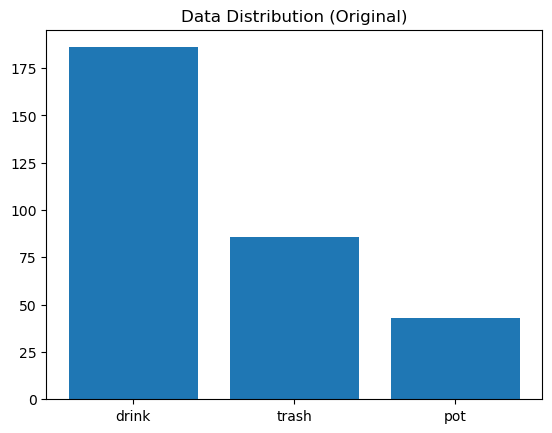

In [6]:
cwd = os.getcwd()
data_directory = cwd+"/training_data"

original_training_data_file_directory_df = get_data_file_directories(data_directory)
plot_data_distribution(original_training_data_file_directory_df, "Original")

In [7]:
num_augmentations = 10
class_with_highest_num = original_training_data_file_directory_df['class'].value_counts().index[0]
num_of_images_for_each_class = len(original_training_data_file_directory_df.loc[original_training_data_file_directory_df['class'] == class_with_highest_num]) * num_augmentations
num_of_augmentation_for_each_class = get_num_of_augmentation_for_each_class(original_training_data_file_directory_df, num_of_images_for_each_class)
generate_augmentations_for_each_class(num_of_augmentation_for_each_class, original_training_data_file_directory_df)

Augmenting: 315 of 315


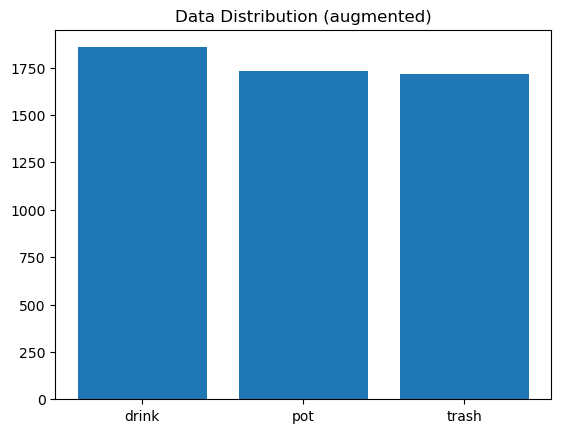

In [8]:
augmented_data_directory = cwd+"/augmented_training_data"
augmented_training_data_file_directory_df = get_data_file_directories(augmented_data_directory)
plot_data_distribution(augmented_training_data_file_directory_df, "augmented")